In [133]:
import pandas as pd 
import numpy as np 
import category_encoders as ce



In [134]:
# !pip install category_encoders

# Importing the dataset and basic validations

In [135]:
df = pd.read_csv('drug200.csv')

In [136]:
df.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [137]:
df.isna().sum()            # Checking the null values 

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [138]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

# Performing the EDA on the dataset 

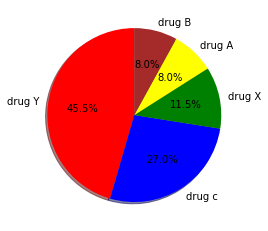

In [139]:
import matplotlib.pyplot as plt 
import seaborn as sns 
values = df["Drug"].value_counts().values
labels = ['drug Y','drug c','drug X','drug A','drug B']
colors = ['red', 'blue','green','yellow','brown']
fig1,ax = plt.subplots()
ax.pie(values,labels = labels,colors = colors,shadow = True,startangle=90,autopct = '%1.1f%%')
plt.show()

<AxesSubplot:xlabel='BP', ylabel='Age'>

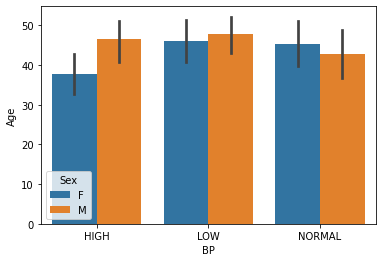

In [140]:
sns.barplot(x = df['BP'],y = df['Age'],hue= df['Sex'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel

<AxesSubplot:xlabel='Age', ylabel='Density'>

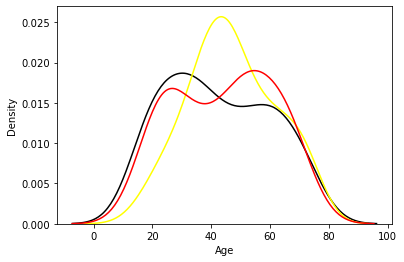

In [141]:
sns.distplot(df[df['BP'] == 'HIGH']['Age'],hist = False,color = 'Black')
sns.distplot(df[df['BP'] == 'LOW']['Age'],hist = False,color = 'Yellow')
sns.distplot(df[df['BP'] == 'NORMAL']['Age'],hist = False,color = 'Red')

In [142]:
# import category_encoders as ec
# from sklearn.preprocessing import OrdinalEncoder
# enc = ec.OrdinalEncoder(cols=['Sex','BP','Cholesterol'])

In [144]:
# Normal way to classify 
df['Sex']=df['Sex'].map({'F':1, 'M':2})
df['BP']=df['BP'].map({'LOW':0,'NORMAL':1, 'HIGH':2})
df['Cholesterol']=df['Cholesterol'].map({'NORMAL':0, 'HIGH':1})
df['Drug']=df['Drug'].map({'drugY':5, 'drugC':3, 'drugX':4, 'drugA':1, 'drugB':2})

In [145]:

from sklearn.model_selection import train_test_split

X = df.drop(['Drug'],axis = 1)
y= df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

X_train = enc.fit_transform(X_train)

X_test = enc.transform(X_test)


# Decision Tree Model Training and testing 

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
import matplotlib.pyplot as plt 

# Pre-pruning the dataset 

In [147]:

depth = [3,4,5,6,7,8,9]
for i in depth :
    D_Class = DecisionTreeClassifier(max_depth=i)
    D_Class.fit(X_train,y_train)
    y_cap = D_Class.predict(X_test)
    acc = accuracy_score(y_test,y_cap)
    dt = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(dt,X_train,y_train,cv= 6)
    print('Depth:',i,'Accuracy :',acc*100,'score:',np.mean(score))


Depth: 3 Accuracy : 77.27272727272727 score: 0.8731884057971014
Depth: 4 Accuracy : 96.96969696969697 score: 1.0
Depth: 5 Accuracy : 96.96969696969697 score: 1.0
Depth: 6 Accuracy : 96.96969696969697 score: 1.0
Depth: 7 Accuracy : 96.96969696969697 score: 1.0
Depth: 8 Accuracy : 96.96969696969697 score: 1.0
Depth: 9 Accuracy : 96.96969696969697 score: 1.0


# Plotting the tree for the dataset

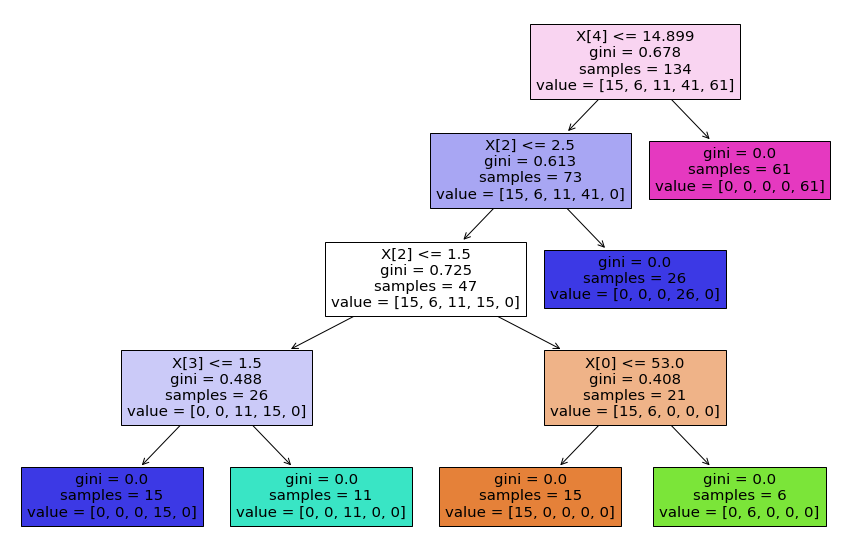

In [148]:
plt.figure(figsize = (15,10) )
tree.plot_tree(D_Class,filled = True)
plt.show()

In [149]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train) 
importance = dt.feature_importances_
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred

array([1, 5, 2, 4, 5, 4, 4, 5, 1, 2, 5, 5, 1, 2, 4, 5, 2, 5, 1, 1, 1, 5,
       5, 5, 5, 4, 3, 3, 5, 5, 5, 5, 4, 5, 5, 2, 5, 4, 5, 5, 1, 4, 5, 4,
       5, 5, 3, 4, 3, 5, 2, 5, 1, 5, 4, 3, 5, 5, 4, 2, 1, 2, 1, 5, 5, 4],
      dtype=int64)

In [150]:
report  = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.80      1.00      0.89         8
           2       1.00      0.80      0.89        10
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        30

    accuracy                           0.97        66
   macro avg       0.96      0.96      0.96        66
weighted avg       0.98      0.97      0.97        66



In [ ]:
# Conclusions : 
'''
Max depth is 4 after using 

'''